<a href="https://colab.research.google.com/github/jinw00jun/ds4ph-bme/blob/master/HW7_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries used

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loading shhs.txt data file as a dataframe using pandas 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving shhs.txt to shhs (2).txt


In [3]:
import io
shhs = pd.read_csv(io.BytesIO(uploaded['shhs.txt']))

In [4]:
shhs.head()

,pptid,clinic,Waist,COPD15,ASTHMA15,slp_lat,time_bed,timest1p,timest2p,times34p,timeremp,rdi4p,StLOutP,StOnsetP,SlpPrdP,Staging1,Staging2,Staging3,Staging4,Staging5,RestAn1,RestAn2,RestAn3,RestAn4,HTN,CVD,CHD,sex,age,smokstatus,bmi
0,0007,41,86,0,0,.,440.5,6.258322,60.852196,19.30759,13.581891,1.438083,28,28,22530,0,0,0,1,0,1,0,0,0,1,0,0,1,55,Former,21.78
1,0009,41,107,0,0,.,225.0,0.824176,65.65934,16.758242,16.758242,17.802198,0,0,10920,.,.,.,.,.,.,.,.,.,1,0,0,1,78,Never,32.95
2,0028,41,82,0,0,.,431.5,4.881451,40.306835,42.817295,11.994421,4.853556,167,167,21510,1,0,0,0,0,1,0,0,0,0,0,0,0,77,Never,24.11
3,0039,41,85,0,0,14,358.5,2.990033,29.401993,52.325581,15.282393,0.797342,54,82,18060,1,0,0,0,0,1,0,0,0,1,0,0,1,48,Never,20.19
4,0045,41,76,0,0,6.5,477.0,5.675676,68.648651,13.378378,12.297297,2.756757,7,20,22200,1,0,0,0,0,1,0,0,0,1,0,0,0,66,Former,23.31


Because bmi values are read as characters, convert it to numeric and drop NA values.
 

In [5]:
df = shhs[['bmi', 'rdi4p']]
df['bmi'] = pd.to_numeric(df['bmi'],errors='coerce')
df = df.dropna()
df['log_rdi4p'] = np.log(df.rdi4p + 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Fitting linear model.

In [6]:
fit = smf.ols('log_rdi4p ~ bmi', data = df).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_rdi4p   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     973.8
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          5.47e-199
Time:                        19:24:45   Log-Likelihood:                -8893.0
No. Observations:                6333   AIC:                         1.779e+04
Df Residuals:                    6331   BIC:                         1.780e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3430      0.067     -5.111      0.000      -0.475      -0.211
bmi            0.0722      0.002     31.207      0.000       0.068       0.077
==============================================================================
Omnibus:                      202.903   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.575
Skew:                           0.266   Prob(JB):                     4.04e-32
Kurtosis:                       2.485   Cond. No.                         157.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Scatter plot + fitted line. 

In [7]:
yhat = fit.predict(df.bmi)

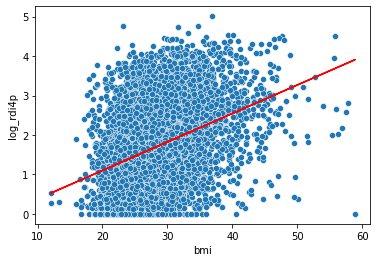

In [8]:
sns.scatterplot(data = df, x= 'bmi', y = 'log_rdi4p' )
plt.plot(df.bmi, yhat, color='r')

Estimation of rdi4p when bmi = 30. 

**The predicted rdi4p is 5.19241304**

In [9]:
intercept = fit.params[0]
b1 = fit.params[1]

In [12]:
print(intercept)
print(b1)

-0.3430244378036704
0.07221164259835346


In [10]:
bmi_val = 30
predicted_log_rdi4p = intercept + b1 * bmi_val
predicted_rdi4p = np.exp(predicted_log_rdi4p)-1

In [11]:
print(predicted_rdi4p)

5.192413044073733
